<a href="https://colab.research.google.com/github/Bovindra/TugasAkhirDataMining/blob/main/Reboisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
dataku = pd.read_csv('reboisasii.csv')

print(f"head: \n{dataku.head(5)}\n")
print(f"Tail: \n {dataku.tail()} \n")
print(f"Describe data: \n{dataku.describe()}\n")
print(f"Info: \n{dataku.info()}\n")

head: 
        Provinsi  2017  2018   2019
0           ACEH   460   885  14143
1  SUMATERAUTARA  1183  1047  17207
2  SUMATERABARAT   580  1140   1551
3           RIAU   560   400  14749
4          JAMBI  1000  1130   1000

Tail: 
          Provinsi  2017  2018  2019
25  SULAWESIBARAT   400   300  2000
26         MALUKU   325   400  2050
27    MALUKUUTARA   205   275   500
28     PAPUABARAT   223   500   300
29          PAPUA   775   525  1000 

Describe data: 
               2017         2018          2019
count     30.000000    30.000000     30.000000
mean    1170.766667   809.833333   6866.366667
std     3537.169769   794.879175   7273.291303
min      205.000000   125.000000    200.000000
25%      307.750000   400.000000    562.500000
50%      475.000000   541.000000   2575.000000
75%      647.500000  1036.500000  13682.250000
max    19837.000000  4505.000000  19600.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Col

In [4]:
X=dataku.drop(columns=["Provinsi"])

In [5]:
#convert categorical data ke Numeric
X['2019'] = X['2019'].astype('str') 
le = LabelEncoder()
X['2019'] = le.fit_transform(X['2019'])

X['2018'] = X['2018'].astype('str') 
le = LabelEncoder()
X['2018'] = le.fit_transform(X['2018'])

X['2017'] = X['2017'].astype('str') 
le = LabelEncoder()
X['2017'] = le.fit_transform(X['2017'])

# X = X.astype('str') 
# le = LabelEncoder()
# X = le.fit_transform(X)

In [6]:
X = pd.DataFrame(X)
X.head()

,2017,2018,2019
0,17,27,4
1,1,1,8
2,20,3,6
3,19,14,5
4,0,2,0


In [8]:
#menebak jumlah cluster yang dibutuhkan
# score = KMeans(n_clusters=2).fit(X).score(X)
#iterasi Score
scr=[]
for i in range (1, 30):
    score = KMeans(n_clusters=i).fit(X).score(X)
    print(score)
    scr.append(score)

-5346.133333333333
-3452.083333333331
-2228.526515151515
-1435.6190476190473
-1103.599999999999
-897.8166666666659
-734.5642857142848
-606.2666666666657
-542.166666666667
-454.58333333333354
-396.8333333333333
-352.8333333333333
-319.5833333333333
-266.0833333333333
-226.91666666666703
-182.33333333333377
-147.00000000000045
-124.83333333333326
-90.33333333333348
-69.5
-56.5
-46.0
-35.5
-26.5
-17.5
-11.5
-7.0
-4.0
-1.0


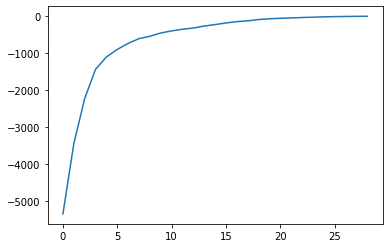

In [9]:
#ambil nilai di tengah2 lekukan untuk nilai cluster disini = 5
plt.plot(scr)

In [10]:
#Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#tambah kolom Cluster
X["Cluster"] = kmeans.labels_
X

,2017,2018,2019,Cluster
0,17,27,4,1
1,1,1,8,3
2,20,3,6,2
3,19,14,5,1
4,0,2,0,3
5,25,22,9,1
6,9,24,23,0
7,21,5,7,2
8,12,12,20,4
9,8,9,19,4


(array([8., 0., 6., 0., 0., 5., 0., 3., 0., 8.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

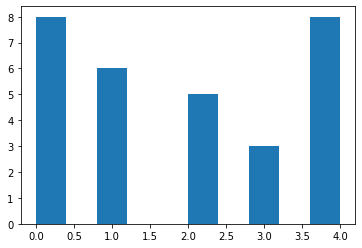

In [12]:
#visualisasi pembagian hasil cluster
plt.hist(X["Cluster"])

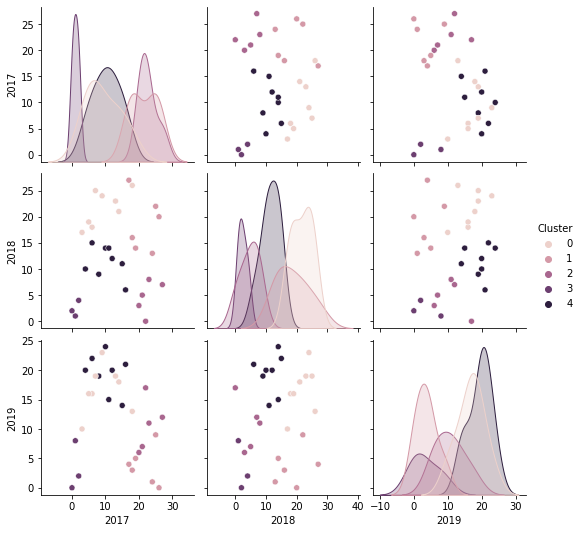

In [13]:
#visualisasi pengelompokan cluster dengan seaborn
sns.pairplot(X, hue="Cluster")